In [1]:
#Reading data

In [3]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import datetime
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.datasets import fetch_species_distributions, load_digits
from sklearn.model_selection import GridSearchCV, LeaveOneOut, train_test_split
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import KFold 
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
data = pd.read_csv("data_AP.csv",dtype={'Symbol': np.str},parse_dates=['Accper'])

C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_4364\4155429469.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.read_csv("data_AP.csv",dtype={'Symbol': np.str},parse_dates=['Accper'])


In [5]:
data

,Stkcd,Accper,Current_Ratio,Liquidity_Ratio,Cash_Ratio,Cash_Flow_Interest_Coverage_Ratio,Asset-liability_Ratio,Equity_Ratio,Total_Assets_Growth_Rate,Net_Profit_Growth_Rate,...,Operational_Index,Return_On_Assets,Return_On_Net_Assets,EBIT,Operating_Profit_Margin,Cost_Profit_Margin,Cash-To-Profit_Ratio,Return_On_Investment,EPS,Future_EPS
0,0055.HK,2019-03-31,1.042785,0.577486,0.163058,19.986092,0.270758,0.371286,-0.005702,0.100264,...,1.004190,0.021926,0.020527,1.380945e+08,0.071808,0.079216,0.656901,0.004662,0.050030,0.092089
1,0055.HK,2019-09-30,1.028640,0.607188,0.197985,365.451594,0.269749,0.369392,0.019587,0.243492,...,2.883482,0.055420,0.053246,3.517456e+08,0.069937,0.085160,1.590517,0.014966,0.112168,0.156581
2,0055.HK,2019-12-31,1.018991,0.630694,0.171091,204.414341,0.278266,0.385551,0.047187,0.379693,...,1.407305,0.073880,0.072159,4.763158e+08,0.071424,0.085806,1.533349,0.020098,0.156581,0.007666
3,0055.HK,2020-03-31,1.035491,0.623834,0.177662,-68.529810,0.269218,0.368398,0.039166,-0.762738,...,-28.797704,0.005578,0.004640,3.665077e+07,0.051783,0.074622,-6.306631,0.012596,0.007666,0.044704
4,0055.HK,2020-06-30,1.022618,0.584835,0.154379,6.187099,0.257824,0.347390,0.026595,-0.402941,...,0.181759,0.022913,0.023732,1.482274e+08,0.104064,0.151667,0.245828,0.019409,0.044704,0.074484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,ZZ-B.ST,2017-12-31,1.252963,0.967910,0.217087,-6.218580,0.636977,1.754648,0.391041,-0.524148,...,-5.846178,0.024385,0.026696,1.318273e+08,0.041494,0.048548,-3.275803,0.156993,0.099440,0.019583
26133,ZZ-B.ST,2018-06-30,1.369232,0.936780,0.326114,2.875350,0.577800,1.368543,0.333473,0.312685,...,0.762842,0.031812,0.054694,2.142928e+08,0.164012,0.206903,0.617738,0.042299,0.236143,0.340842
26134,ZZ-B.ST,2018-09-30,1.425613,0.955237,0.354545,-0.779157,0.590018,1.439129,0.393759,0.371169,...,-0.243447,0.045464,0.076671,3.175173e+08,0.168826,0.215357,-0.196121,0.042299,0.340842,0.199575
26135,ZZ-B.ST,2018-12-31,1.069262,0.834902,0.094393,1.851293,0.663207,1.969187,0.157210,2.354460,...,1.544324,0.051099,0.085100,3.466858e+08,0.079311,0.149121,0.790663,0.042299,0.199575,0.017345


In [6]:
#feature and response

In [7]:
feature_global=data.iloc[:,2:-1]
response_global=data.iloc[:,-1]
response_global=response_global.values.reshape(-1,1)

In [8]:
#standard
X_tool = StandardScaler()
y_tool = StandardScaler()
x_std = X_tool.fit_transform(feature_global)
y_std = y_tool.fit_transform(response_global)
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.25)

In [9]:
######reducing the dimension


# Embedded method-RF

In [10]:
rf = RandomForestRegressor(n_jobs=10, n_estimators=500)
rf.fit(x_train, y_train)
im = rf.feature_importances_

C:\Users\JanRuoYu\AppData\Local\Temp\ipykernel_4364\1100909018.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


In [11]:
FS = pd.DataFrame({"Var": ["X%s" % (i+1) for i in range(len(im))],
                   'Name': data.columns[2:-1],
                   "Importance": im})
FS["rank"] = FS["Importance"].rank(ascending=False)
FS = FS.sort_values(by="Importance", ascending=True)
FS.reset_index(drop=True, inplace=True)
FS.to_csv("importance.csv", index=False)


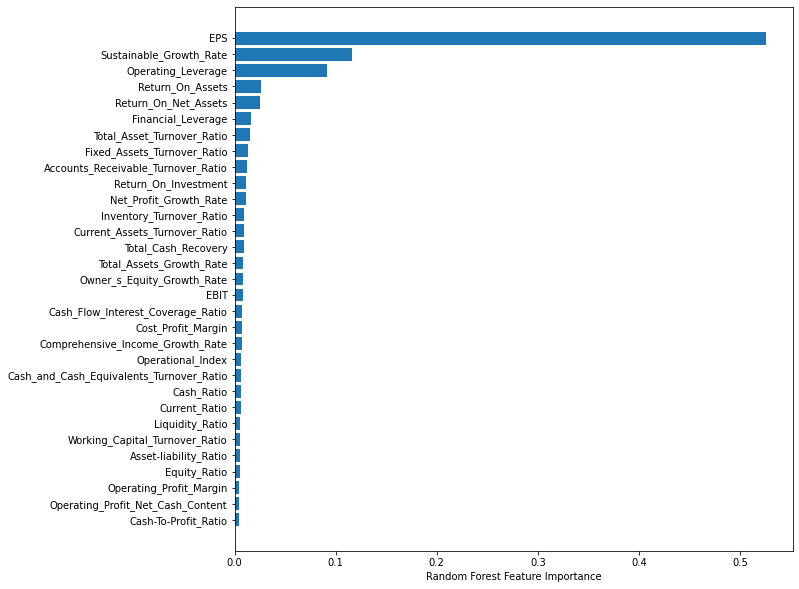

In [12]:
plt.figure(figsize=(10,10))
plt.barh(FS.iloc[:,1],FS.iloc[:,2])
plt.xlabel("Random Forest Feature Importance")
plt.savefig("rf_importance.png")

LSTM

In [34]:
kfolds = KFold(n_splits=5, random_state=888, shuffle=True)

In [35]:
x_sel = x_std[:, FS["rank"] <= 20]
x_train, x_test, y_train, y_test = train_test_split(x_std,y_std,test_size=0.25)

In [22]:
# # 定义神经网络模型中的eaylu stop 如果测试集误差连续patienc次不再下降 则返回测试集对应的最佳模型 restore_best_weights 返回最佳
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
# # 定义lstm模型
# model = tf.keras.Sequential([
#     # 变成n*1序列
#     tf.keras.layers.Reshape((x_train_pca.shape[1], 1), input_shape=(x_train_pca.shape[1],)),
#     # lstm
#     tf.keras.layers.LSTM(64, activation="relu", input_shape=(x_train_pca.shape[1], 1)),
#     # dropout 增加泛化能力
#     tf.keras.layers.Dropout(0.2),
#     # 输出层
#     tf.keras.layers.Dense(1)
# ])
# # optimizer 优化器 求解算法 比如sgd是梯度下降 这个是nadam是sgd的改进
# # loss 损失函数
# model.compile(optimizer='RMSProp', loss='mae')
# # validation data 验证集
# # epochs 迭代次数
# # barch size 批次数量 每次更新模型参数的样本数量
# # use_multiprocessing 多线程计算加快计算速度
# history = model.fit(x_train_pca, y_train,
#                     validation_data=(x_test_pca, y_test),
#                     epochs=1000,
#                     verbose=0, # 0不查看迭代过程 可取0 1 2
#                     batch_size=32,
#                     use_multiprocessing=True,
#                     callbacks=[early_stopping])

In [23]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [24]:
import tensorflow.keras

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=48)
cvscores = []
Monitor=['loss','val_accuracy']
MIN_delta=[0,10e-8,10e-6,10e-4]
PATience=(np.linspace(start = 5, stop = 50, num = 5)).astype(int)
ACTivation=["relu","softmax","selu"]
Loss=["mean_squared_error","mae"]
Optimizer=["RMSprop","SGD","Adagrad","Adam"]





Acc=0
count=0

for i1 in range(0,3):
    for i2 in range (0,4):
        for i3 in range(0,4):
            for i4 in range(0,3):
                for i5 in range(0,2):
                    for i6 in range(0,5):
                        for train, test in kfold.split(x_train_pca, y_train):
                            # 定义神经网络模型中的eaylu stop 如果测试集误差连续patienc次不再下降 则返回测试集对应的最佳模型 restore_best_weights 返回最佳
                            early_stopping = tf.keras.callbacks.EarlyStopping(monitor=Monitor[i1],min_delta=MIN_delta[i2], patience=PATience[i3], restore_best_weights=True)
                            # 定义lstm模型
                            model = tf.keras.Sequential([
                                # 变成n*1序列
                                tf.keras.layers.Reshape((x_train_pca.shape[1], 1), input_shape=(x_train_pca.shape[1],)),
                                # lstm
                                tf.keras.layers.LSTM(64, activation=ACTivation[i4], input_shape=(x_train_pca.shape[1], 1)),
                                # dropout 增加泛化能力
                                tf.keras.layers.Dropout(0.2),
                                # 输出层
                                tf.keras.layers.Dense(1)
                            ])
                            # optimizer 优化器 求解算法 比如sgd是梯度下降 这个是nadam是sgd的改进
                            # loss 损失函数
                            model.compile(optimizer=Optimizer[i6], loss=Loss[i5])
                            # validation data 验证集
                            # epochs 迭代次数
                            # barch size 批次数量 每次更新模型参数的样本数量
                            # use_multiprocessing 多线程计算加快计算速度
                            history = model.fit(x_train_pca, y_train,
                                                epochs=1000,
                                                verbose=0, # 0不查看迭代过程 可取0 1 2
                                                batch_size=32,
                                                use_multiprocessing=True,
                                                callbacks=[early_stopping])
                            scores = model.evaluate(x_test_pca,y_test, verbose=0)
                            cvscores.append(scores)
                            count=count+1
                            print("Conducting "+str(count)+" iteration.")
                            
                            if (scores>Acc):
                                Acc=scores
                                Mon=Monitor[i1]
                                MIN=MIN_delta[i2]
                                PAT=PATience[i3]
                                ACT=ACTivation[i4]
                                Opt=Optimizer[i6]
                                LOSS=Loss[i5]

print("The best hyper-parameter of is: The monitor is "+Monitor[i1]+" and MIN_delta[i2] is set to "+str(MIN_delta[i2]))
print("The PAT is "+str(PAT)+" and ACT is set to "+ACT+" and OPT is "+Opt+" and loss function is "+LOSS)

Conducting 1 iteration.
Conducting 2 iteration.
Conducting 3 iteration.
Conducting 4 iteration.
Conducting 5 iteration.
Conducting 6 iteration.
Conducting 7 iteration.
Conducting 8 iteration.
Conducting 9 iteration.
Conducting 10 iteration.
Conducting 11 iteration.
Conducting 12 iteration.
Conducting 13 iteration.
Conducting 14 iteration.
Conducting 15 iteration.
Conducting 16 iteration.
Conducting 17 iteration.
Conducting 18 iteration.
Conducting 19 iteration.
Conducting 20 iteration.
Conducting 21 iteration.
Conducting 22 iteration.
Conducting 23 iteration.
Conducting 24 iteration.
Conducting 25 iteration.
Conducting 26 iteration.
Conducting 27 iteration.


In [48]:
history = model.fit(x_train_pca, y_train,
                    validation_data=(x_test_pca, y_test),
                    epochs=1000,
                    verbose=0, # 0不查看迭代过程 可取0 1 2
                    batch_size=32,
                    use_multiprocessing=True,
                    callbacks=[early_stopping])
y_tool.inverse_transform(model.predict(x_train_pca))

array([[0.35137472],
       [0.3277177 ],
       [0.87132317],
       ...,
       [0.34751272],
       [1.0505025 ],
       [0.35353982]], dtype=float32)

In [39]:
x_train_pca.shape

(20909, 17)

In [40]:
y_train.shape

(20909, 1)

In [52]:
y_train_pre=y_tool.inverse_transform(model.predict(x_train_pca))
for i in range(len(y_train_pre)):
    if (y_train_pre[i]<tier25):
        y_train_pre[i]=-1
    elif (y_train_pre[i]>tier75):
        y_train_pre[i]=1
    else:
        y_train_pre[i]=0
num=0
for i in range(len(y_train_pre)):
    if (y_train_pre[i]==y_train[i]):
        num=num+1
acc=num/len(y_train_pre)
print('acc=',acc)

acc= 0.6278635994069539


In [34]:
y_test_pre=y_tool.inverse_transform(model.predict(x_test))
for i in range(len(y_test_pre)):
    if (y_test_pre[i]<tier25):
        y_test_pre[i]=-1
    elif (y_test_pre[i]>tier75):
        y_test_pre[i]=1
    else:
        y_test_pre[i]=0
num=0
for i in range(len(y_test_pre)):
    if (y_test_pre[i]==y_test[i]):
        num=num+1
acc=num/len(y_test_pre)
print('acc=',acc)

acc= 0.6408569242540169


Transform label to int

In [30]:
data2 = data.sort_values(by=['Future_EPS'])
data2=data2.reset_index(drop=True)
tier25=data2.iloc[6534,-1]
tier75=data2.iloc[19603,-1]
data2['Classified']=0
for i in range(0,6534):
  data2.iloc[i,-1]=-1
for i in range (19603,26137):
  data2.iloc[i,-1]=1
data4 = data2.sort_values(by=['Stkcd','Accper'])
data4=data4.drop(columns=['Future_EPS'])
data4=data4.reset_index(drop=True)
feature_global=data4.iloc[:,2:-1]
response_global=data4.iloc[:,-1]
response_global=response_global.values.reshape(-1,1)
X_tool = StandardScaler()
x_std = X_tool.fit_transform(feature_global)
y_std = response_global
x_train,x_test,y_train,y_test = train_test_split(x_std,y_std,test_size=0.25)

In [31]:
data4

,Stkcd,Accper,Current_Ratio,Liquidity_Ratio,Cash_Ratio,Cash_Flow_Interest_Coverage_Ratio,Asset-liability_Ratio,Equity_Ratio,Total_Assets_Growth_Rate,Net_Profit_Growth_Rate,...,Operational_Index,Return_On_Assets,Return_On_Net_Assets,EBIT,Operating_Profit_Margin,Cost_Profit_Margin,Cash-To-Profit_Ratio,Return_On_Investment,EPS,Classified
0,0055.HK,2019-03-31,1.042785,0.577486,0.163058,19.986092,0.270758,0.371286,-0.005702,0.100264,...,1.004190,0.021926,0.020527,1.380945e+08,0.071808,0.079216,0.656901,0.004662,0.050030,0
1,0055.HK,2019-09-30,1.028640,0.607188,0.197985,365.451594,0.269749,0.369392,0.019587,0.243492,...,2.883482,0.055420,0.053246,3.517456e+08,0.069937,0.085160,1.590517,0.014966,0.112168,0
2,0055.HK,2019-12-31,1.018991,0.630694,0.171091,204.414341,0.278266,0.385551,0.047187,0.379693,...,1.407305,0.073880,0.072159,4.763158e+08,0.071424,0.085806,1.533349,0.020098,0.156581,-1
3,0055.HK,2020-03-31,1.035491,0.623834,0.177662,-68.529810,0.269218,0.368398,0.039166,-0.762738,...,-28.797704,0.005578,0.004640,3.665077e+07,0.051783,0.074622,-6.306631,0.012596,0.007666,-1
4,0055.HK,2020-06-30,1.022618,0.584835,0.154379,6.187099,0.257824,0.347390,0.026595,-0.402941,...,0.181759,0.022913,0.023732,1.482274e+08,0.104064,0.151667,0.245828,0.019409,0.044704,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26132,ZZ-B.ST,2017-12-31,1.252963,0.967910,0.217087,-6.218580,0.636977,1.754648,0.391041,-0.524148,...,-5.846178,0.024385,0.026696,1.318273e+08,0.041494,0.048548,-3.275803,0.156993,0.099440,-1
26133,ZZ-B.ST,2018-06-30,1.369232,0.936780,0.326114,2.875350,0.577800,1.368543,0.333473,0.312685,...,0.762842,0.031812,0.054694,2.142928e+08,0.164012,0.206903,0.617738,0.042299,0.236143,0
26134,ZZ-B.ST,2018-09-30,1.425613,0.955237,0.354545,-0.779157,0.590018,1.439129,0.393759,0.371169,...,-0.243447,0.045464,0.076671,3.175173e+08,0.168826,0.215357,-0.196121,0.042299,0.340842,0
26135,ZZ-B.ST,2018-12-31,1.069262,0.834902,0.094393,1.851293,0.663207,1.969187,0.157210,2.354460,...,1.544324,0.051099,0.085100,3.466858e+08,0.079311,0.149121,0.790663,0.042299,0.199575,-1


PCA

In [1]:
import matplotlib.pyplot as plt
import sklearn.decomposition as dp
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=0.85)
#='mle'

In [36]:
x_std_pca = pca.fit_transform(x_std)
x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_std_pca,y_std,test_size=0.2)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [37]:
np.shape(x_std_pca)

(26137, 17)

In [38]:
np.shape(x_train_pca)

(20909, 17)

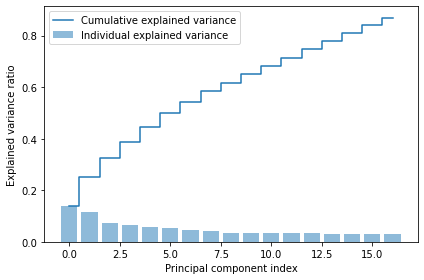

<Figure size 432x288 with 0 Axes>

In [23]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
plt.savefig("pca_importance.png")

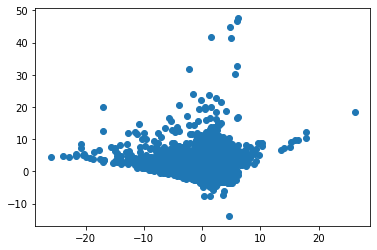

<Figure size 432x288 with 0 Axes>

In [24]:
pca.fit(x_std)
# 输出特征值
#print(pca.explained_variance_)
# 输出特征向量
#print(pca.components_)
# 降维后的数据
x_new = pca.transform(x_std)
fig = plt.figure()
plt.scatter(x_new[:, 1],x_new[:, 0], marker='o')
plt.show()
plt.savefig("1vs2_pca.png")

In [25]:
from pandas.core.frame import DataFrame
import seaborn as sns

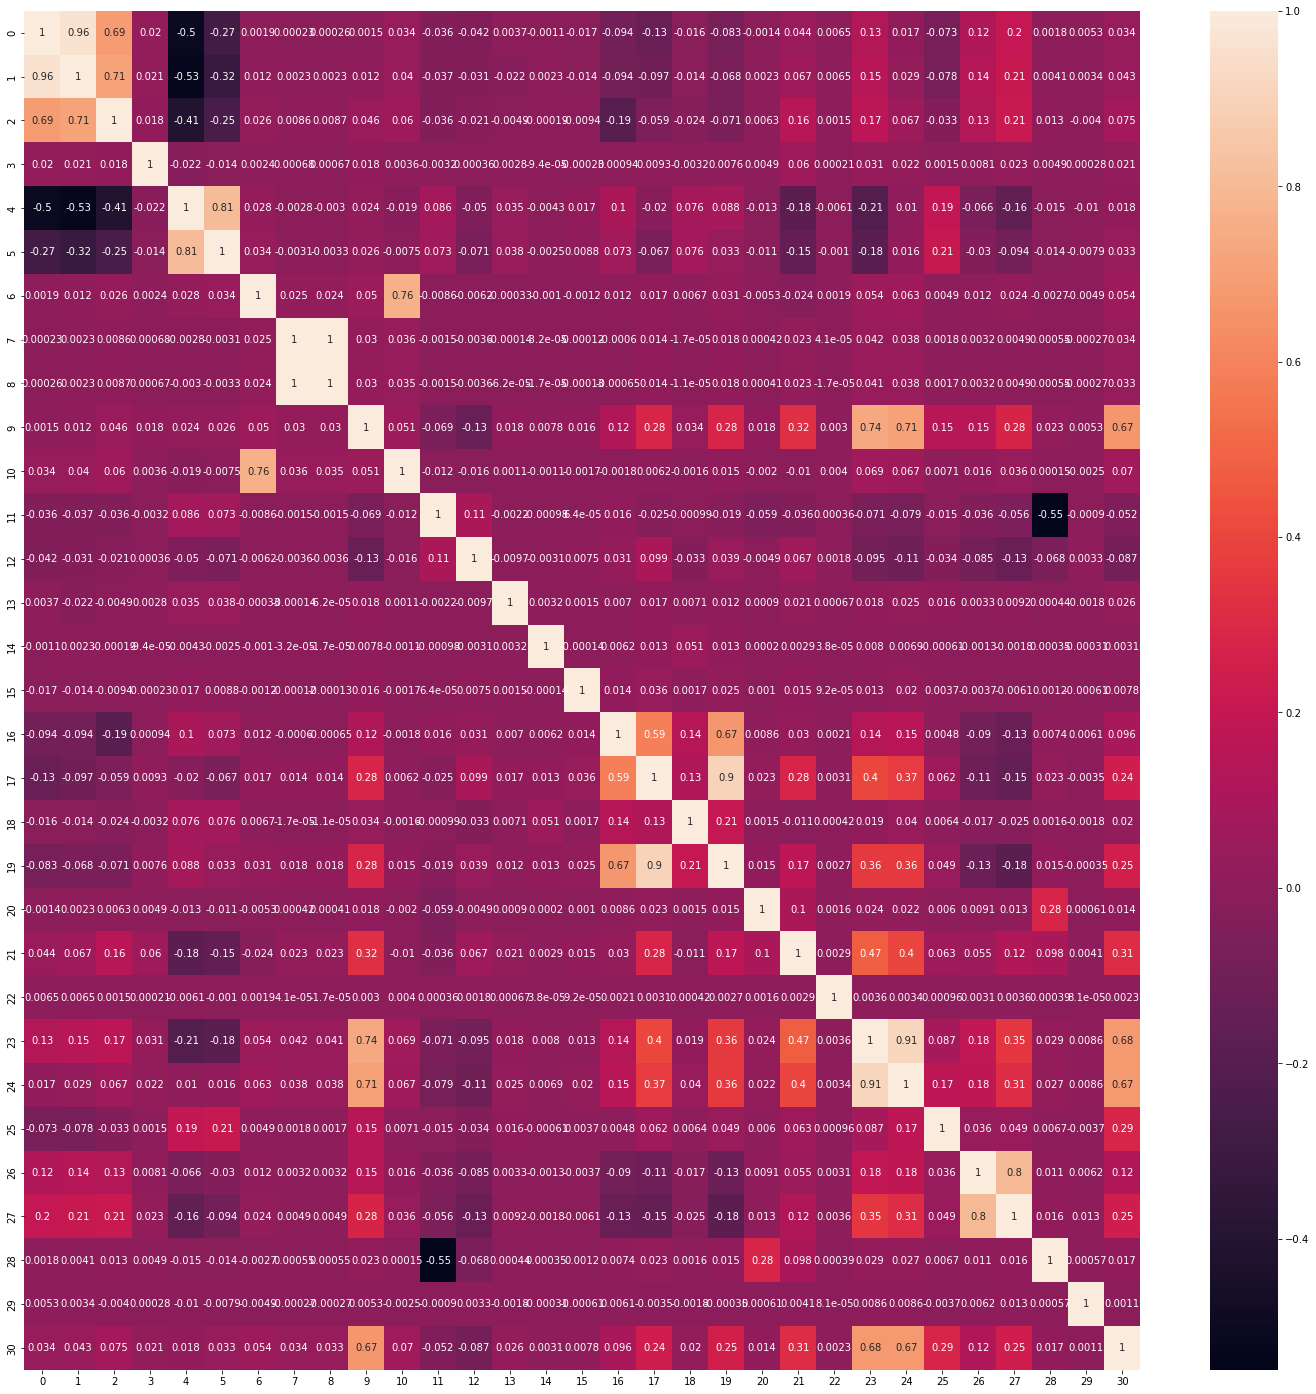

In [26]:
plt.figure(figsize=(25,25))
x = pd.DataFrame(x_std)
sns.heatmap(x.corr(), annot=True) 
plt.savefig("heat_corvariance.png")


SVM

In [21]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [24]:
# Tune for SVM
print("Here is the tuning for SVM")
print("Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter")
x=x_train_pca
y=y_train

Kernel=['poly','linear','rbf']
Tol=[10e-4,10e-5,10e-6,10e-7,10e-8]
c=[1.0,2.0,3.0,4.0,5.0]
Acc=0

#     #################
#     j_range=[1.0,2.0,3.0,4.0,5.0]
#     j_acc=[]
#     nameee=['Pair 1','Pair 2 ','Pair 3']
#     ##################

for j in range(0,3):
    for k in range(0,5):
        for m in range(0,5):
            SVM=OneVsRestClassifier(svm.SVC(kernel=Kernel[j],tol=Tol[k],C=c[m]))
#             SVM=OneVsOneClassifier(svm.SVC(kernel='poly',tol=10e-4,C=c[m]))
            scores = cross_val_score(SVM,x, y, scoring='accuracy', cv=kfolds, n_jobs=-1)
#                 ##############
#             j_acc.append(scores.mean())
#                 ####################
            if (scores.mean()>Acc):
                Acc=scores.mean()
                KERNEL=Kernel[j]
                Tolerance=Tol[k]
                Penalty=c[m]
#     ################    
#     plt.plot(j_range, j_acc,label=nameee[i])
#     plt.xlabel("Penalty")
#     plt.ylabel("Cross validated accuracy")
#     plt.legend()
#     ####################


print("The best hyper-parameter of pair "+str(i+1)+" is: KERNEL = "+KERNEL+",  Tolerance = "+str(Tolerance)+", and Penalty = "+str(Penalty))
print("The corresponding accuracy is "+str(Acc))

Here is the tuning for SVM
Tolerance is for tolearance of maximum error in fitting, and Penalty is for penalty parameter


NameError: name 'kfolds' is not defined

In [ ]:
SVM=OneVsRestClassifier(svm.SVC(kernel=Kernel[j],tol=Tol[k],C=c[m]))


In [41]:
# clt = model.fit(x_train_pca,y_train)
# # clt = model.fit(x_train,y_train)

In [32]:
#y_test_pred = SVM.predict(x_test_pca)
y_test_pred = SVM.predict(x_test)
ov_acc = metrics.accuracy_score(y_test_pred,y_test)
print("overall accuracy: %f"%(ov_acc))
print("===========================================")
acc_for_each_class = metrics.precision_score(y_test,y_test_pred,average=None)
print("acc_for_each_class:\n",acc_for_each_class)
print("===========================================")
avg_acc = np.mean(acc_for_each_class)
print("average accuracy:%f"%(avg_acc))

overall accuracy: 0.560367
acc_for_each_class:
 [0.74861878 0.53197111 0.74798387]
average accuracy:0.676191
